<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


**Task 2a: For the "Median value of owner-occupied homes" provide a boxplot:**
* MEDV - Median value of owner-occupied homes in $1000's.
* We use the boxplot() function from the seaborn library.

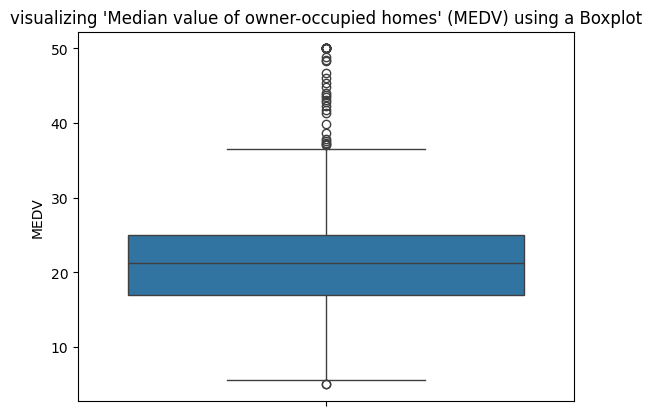

In [17]:
# boston_df = boston_df.rename(columns={0: 'NUMBER'})
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.title("visualizing 'Median value of owner-occupied homes' (MEDV) using a Boxplot")
pyplot.show()

**Task 2b: Provide a bar plot for the Charles river variable:**
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* We plot the barplot using the seaborn library. 

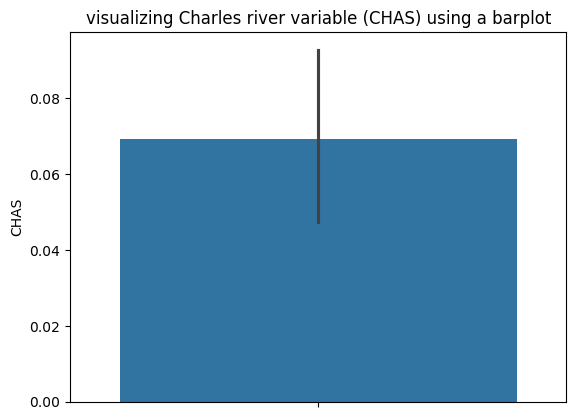

In [15]:
ax = sns.barplot(y="CHAS", data=boston_df)
pyplot.title("visualizing Charles river variable (CHAS) using a barplot")
pyplot.show()

**Task 2c: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older):**
* MEDV - Median value of owner-occupied homes in $1000's
* AGE - proportion of owner-occupied units built prior to 1940

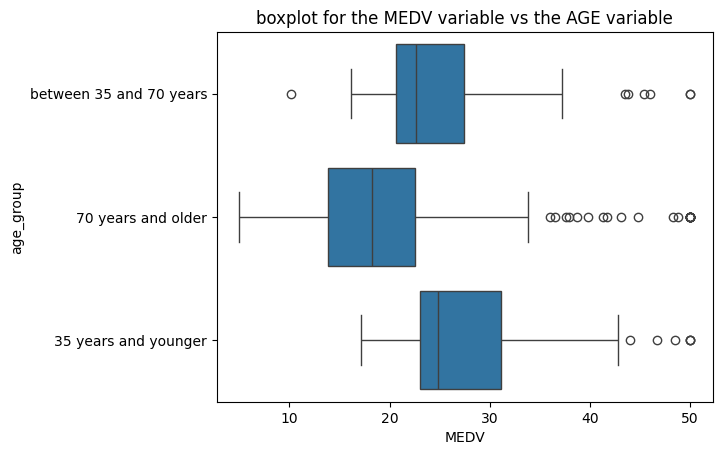

In [12]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
ax = sns.boxplot(x='MEDV', y='age_group', data=boston_df)
pyplot.title("boxplot for the MEDV variable vs the AGE variable")
pyplot.show()

**Task 2d: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**
* NOX - nitric oxides concentration (parts per 10 million)
* INDUS - proportion of non-retail business acres per town.
* We plot the scatterplot using the seaborn library.

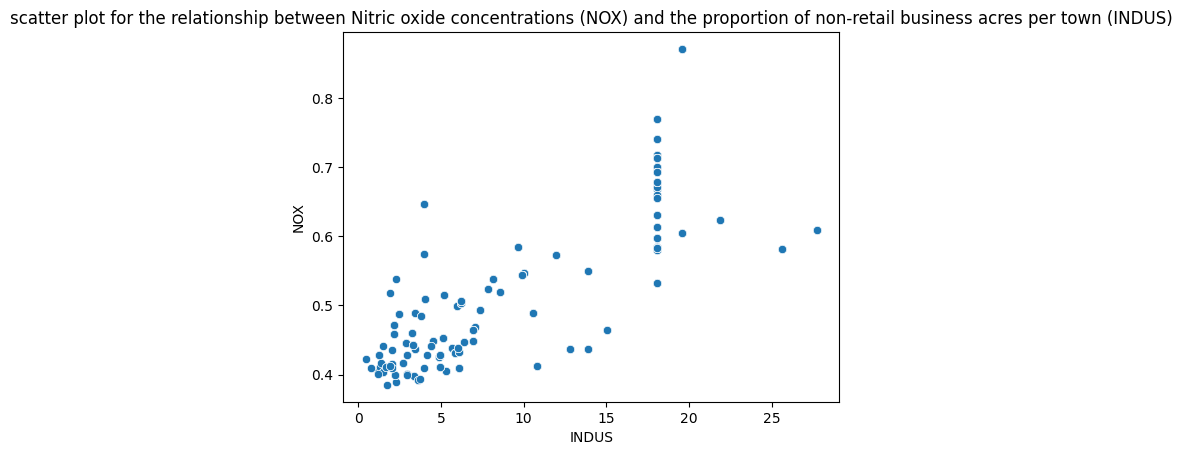

In [13]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title("scatter plot for the relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS)")
pyplot.show()

Conclusion: Looking at the graph it seems like there is a relation between both variables: the more non-retail business is present the higher the nitric oxide concentrations.

**Task 2e: Create a histogram for the pupil to teacher ratio variable**
* PTRATIO - pupil-teacher ratio by town

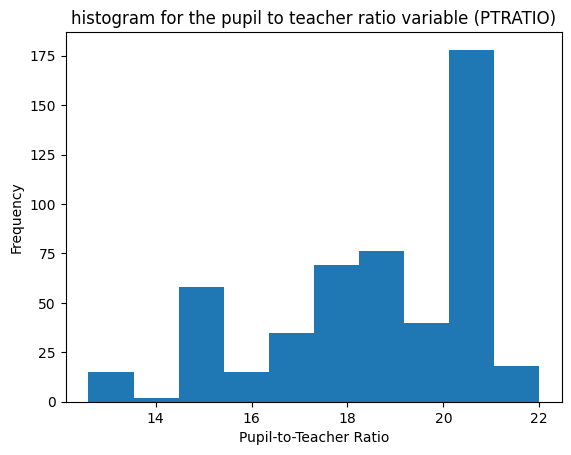

In [18]:
pyplot.hist(boston_df['PTRATIO'])
pyplot.title("histogram for the pupil to teacher ratio variable (PTRATIO)")
pyplot.xlabel('Pupil-to-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

**Task 3a: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* MEDV - Median value of owner-occupied homes in $1000's

* H0: there is no significant difference in median value of houses bounded by the Charles river (P-value > 0.05)
* H1: there is  a significant difference in median value of houses bounded by the Charles river (P-value < 0.05)

In [35]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'])

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Conclusion: Since the p-value is smaller than 0.05, we reject the Null hypothesis and conclude that there is a significant difference in median value of houses bounded by the Charles river.

**Task 3b: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**
* MEDV - Median value of owner-occupied homes in $1000's
* AGE - proportion of owner-occupied units built prior to 1940

* H0: All age groups have the same mean values of houses (P-value > 0.05)
* H1: There is a difference in Median values of houses for the age groups (P-value < 0.05)

In [36]:
thirtyfive_younger_MEDV = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy_MEDV = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older_MEDV      = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [37]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_younger_MEDV, thirtyfive_seventy_MEDV, seventy_older_MEDV)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Conclusion: Since the p-value is smaller than 0.05, we reject the Null hypothesis and conclude that there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

**Task 3c: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**
* NOX - nitric oxides concentration (parts per 10 million)
* INDUS - proportion of non-retail business acres per town.

* H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town (P-value > 0.05)
* H1: There is  a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town (P-value < 0.05)

In [39]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Conclusion: Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

**Task 3d: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**
* DIS - weighted distances to five Boston employment centres
* MEDV - Median value of owner-occupied homes in $1000's

* H0: There is no relation between the additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. (P-value > 0.05)
* H1: There is  a relation between the additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. (P-value < 0.05)

In [40]:
## X is the input variables (or independent variables)
X = boston_df['MEDV']
## y is the target/dependent variable
y = boston_df['DIS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        12:02:54   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis and conclude that there exists a relation between the additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.